In [16]:
import matplotlib.pyplot as plt
import pathlib
import pickle
import random
import re
import tensorflow as tf
import unicodedata

In [3]:
# download dataset provided by Anki: https://www.manythings.org/anki/
text_file = tf.keras.utils.get_file(
    fname="fra-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True
)

# Show where the file is located now
text_file = pathlib.Path(text_file).parent / "fra.txt"
print(text_file)

3423204/3423204 [==============================] - 1s 0us/step
/Users/user/.keras/datasets/fra.txt


### 02. Text Normalization

In [13]:
def normalize(line):
    """Normalize a line of text and split into two at the tab character"""
    line = unicodedata.normalize('NFKC', line.strip().lower())
    line = re.sub(r"^([^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(\s[^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(?!\s)([^ \w])$", r" \1", line)
    line = re.sub(r"(?!\s)([^ \w]\s)", r" \1", line)
    eng, fra = line.split('\t')
    fra = f"[start] {fra} [end]"
    return eng, fra

In [14]:
# normalize each line and separate into English and French
with open(text_file) as fp:
    text_pairs = [normalize(line) for line in fp]

# show some samples
for i in range(5):
    print(random.choice(text_pairs))

with open('text_pairs.pickle', 'wb') as fp:
    pickle.dump(text_pairs, fp)

('this color is a bit darker than that one .', '[start] cette couleur est un peu plus sombre que celle-ci . [end]')
('i want to go there once more .', '[start] je veux y aller une fois encore . [end]')
('is there someone with you ?', "[start] y a-t-il quelqu'un avec vous  ?  [end]")
("leave me alone or i'll call the police .", "[start] laissez-moi tranquille ou j'appelle la police  !  [end]")
('i plan to go to france next year .', "[start] j'ai l'intention d'aller en france l'année prochaine . [end]")


In [15]:
with open('text_pairs.pickle', 'rb') as fp:
    text_pairs = pickle.load(fp)

# count
eng_token, fra_token = set(), set()
eng_maxlen, fra_maxlen = 0, 0
for eng, fra in text_pairs:
    eng_tok, fra_tok = eng.split(), fra.split()
    eng_maxlen = max(eng_maxlen, len(eng_tok))
    fra_maxlen = max(fra_maxlen, len(fra_tok))
    eng_token.update(eng_tok)
    fra_token.update(fra_tok)

print(f"Total English token: {len(eng_token)}")
print(f"Total French token: {len(fra_token)}")
print(f"Maximum English length: {eng_maxlen}")
print(f"Maximum French length: {fra_maxlen}")
print(f"{len(text_pairs)} total pairs")

Total English token: 14969
Total French token: 29219
Maximum English length: 51
Maximum French length: 60
167130 total pairs


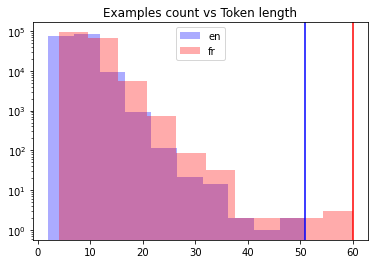

In [20]:
# histogram of sentence length in tokens
en_lengths = [len(eng.split()) for eng, fra in text_pairs]
fr_lengths = [len(fra.split()) for eng, fra in text_pairs]

plt.hist(en_lengths, label='en', color='blue', alpha=0.33)
plt.hist(fr_lengths, label='fr', color='red', alpha=0.33)
plt.yscale('log')
plt.ylim(plt.ylim())
plt.plot([max(en_lengths), max(en_lengths)], plt.ylim(), color='blue')
plt.plot([max(fr_lengths), max(fr_lengths)], plt.ylim(), color='red')
plt.legend()
plt.title('Examples count vs Token length')
plt.show()

### 03. Vectorization & Making Datasets